In [13]:
import glob
import os
import cv2
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

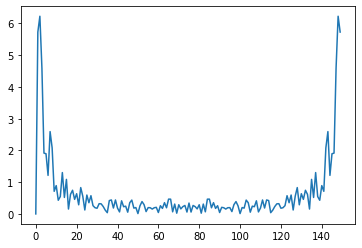

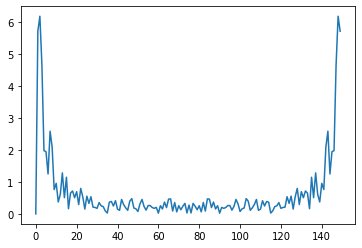

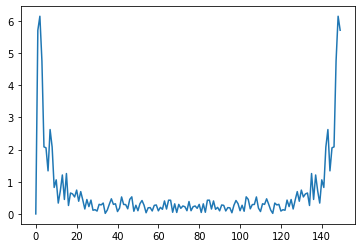

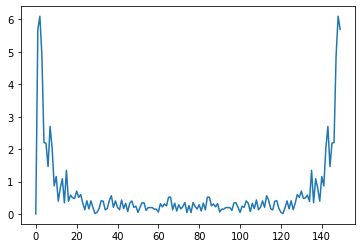

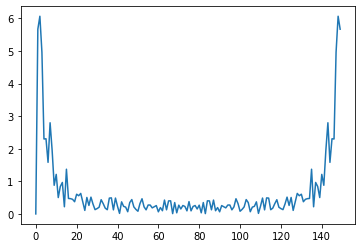

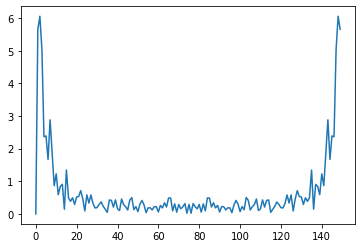

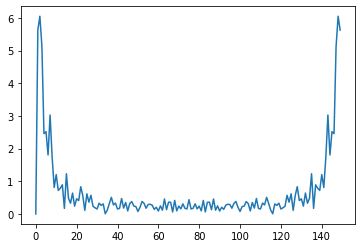

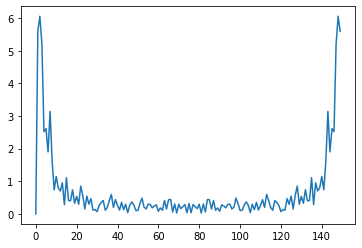

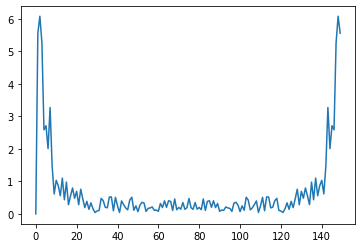

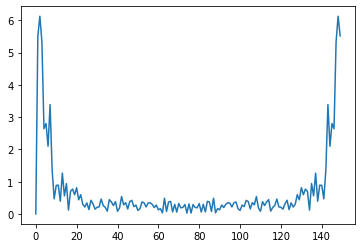

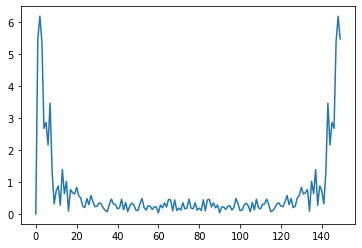

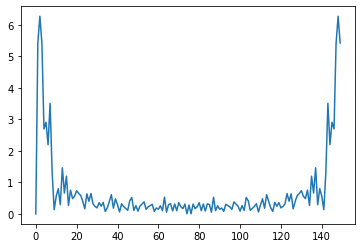

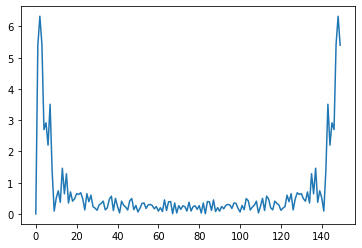

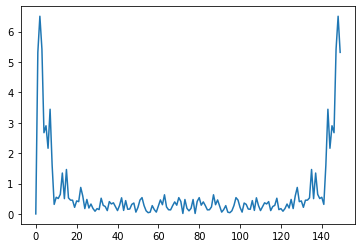

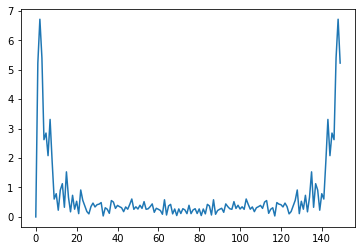

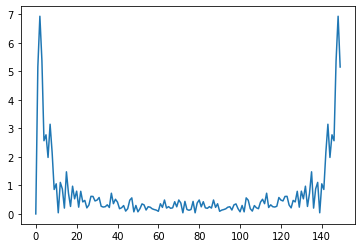

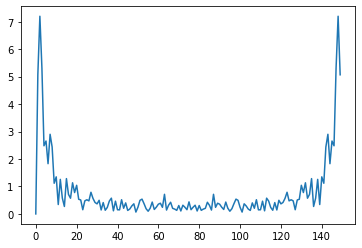

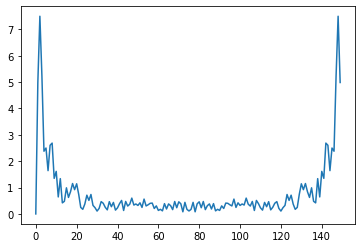

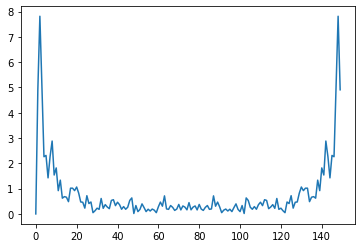

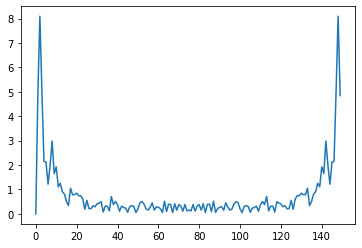

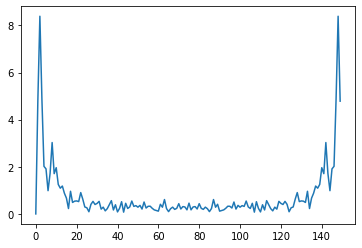

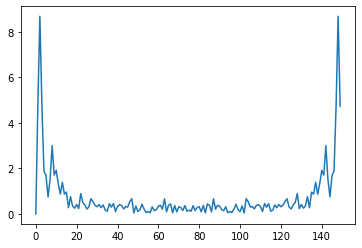

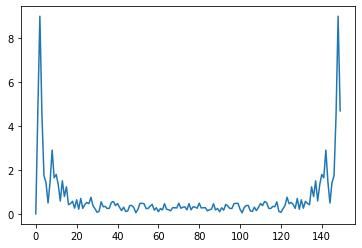

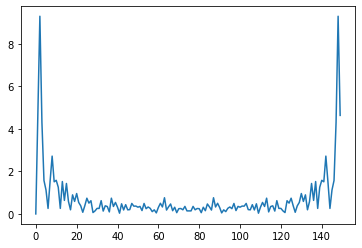

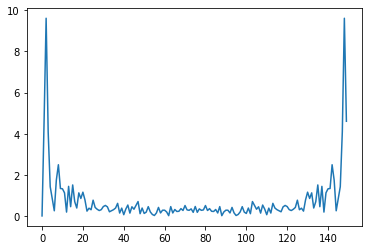

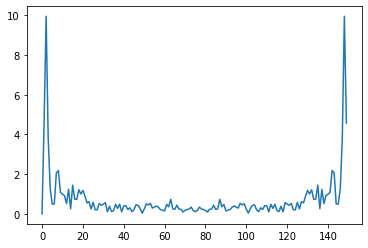

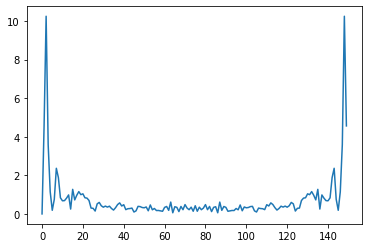

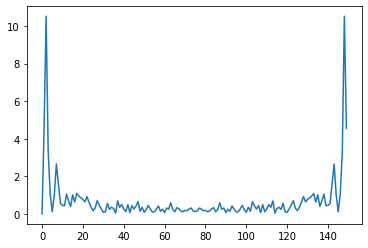

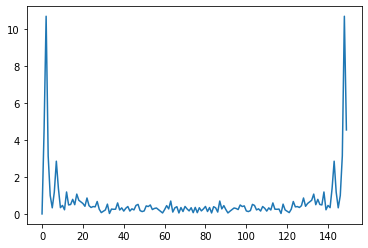

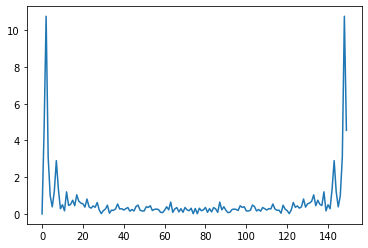

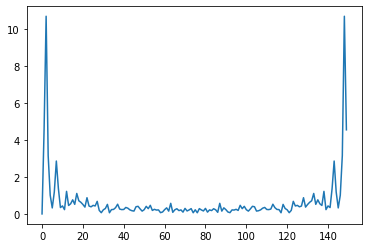

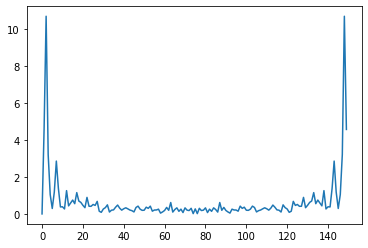

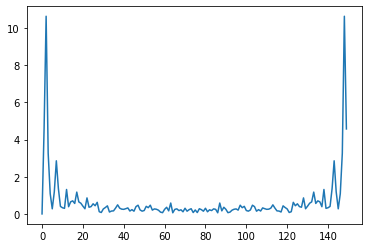

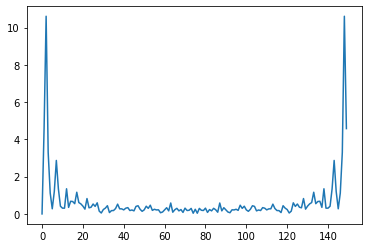

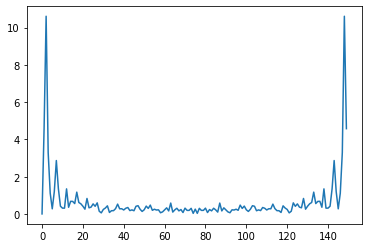

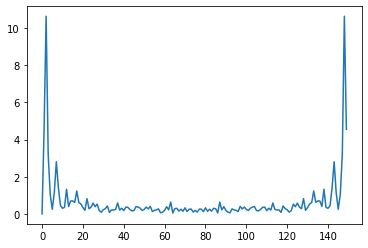

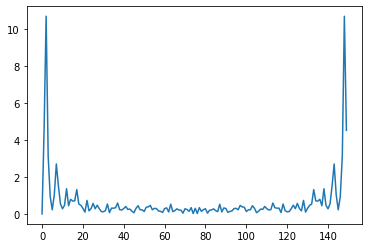

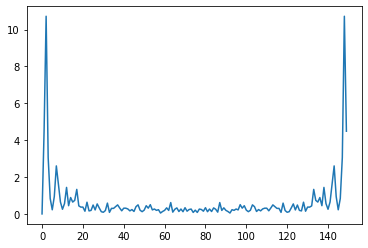

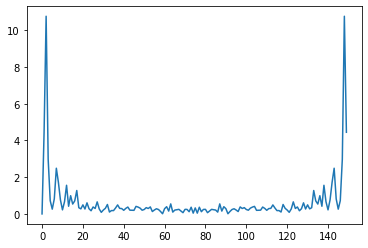

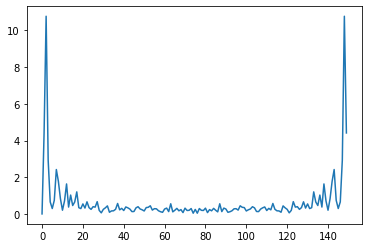

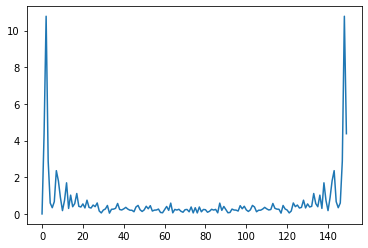

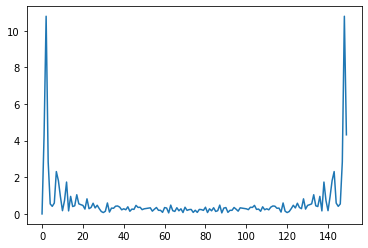

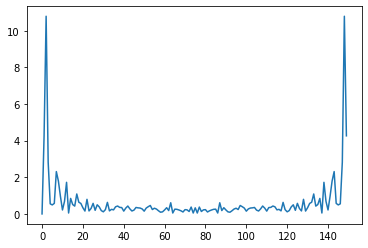

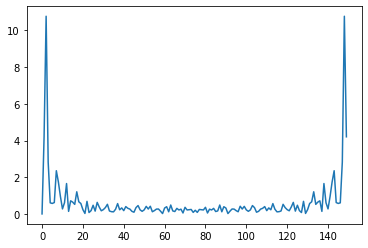

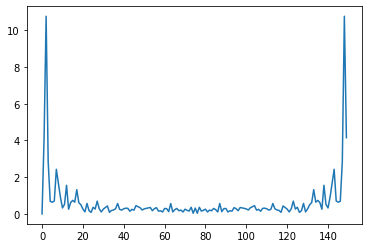

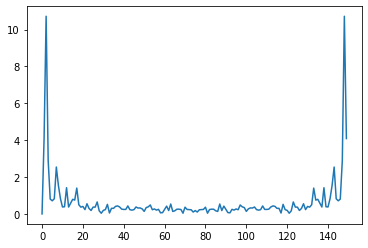

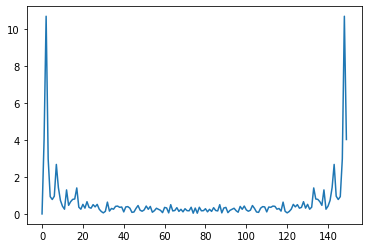

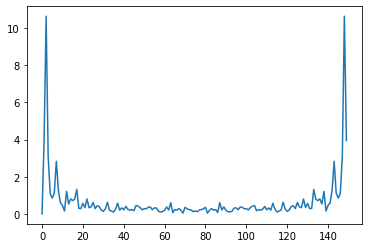

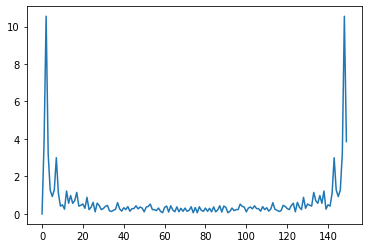

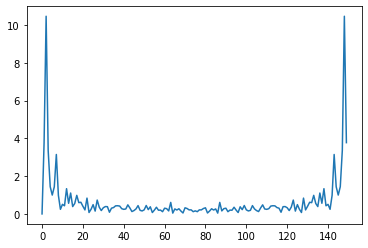

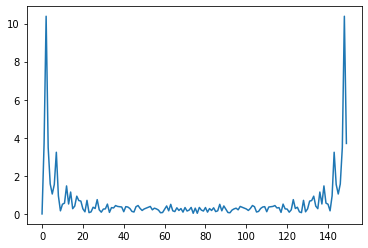

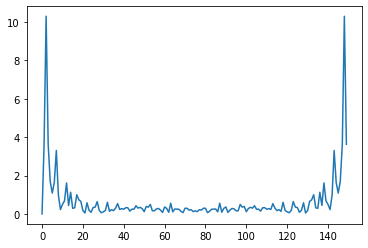

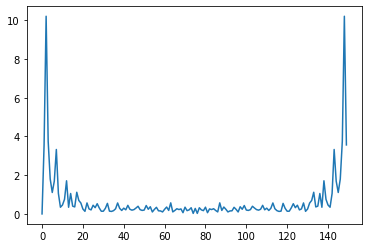

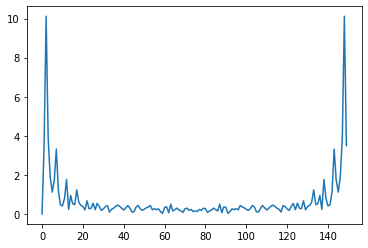

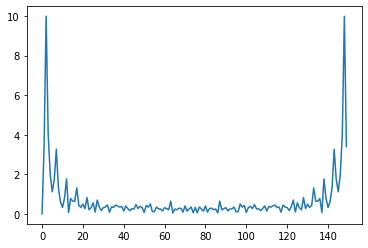

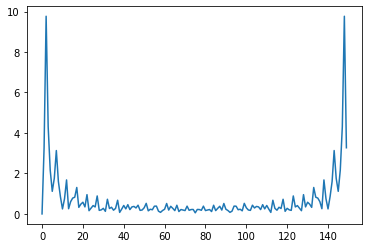

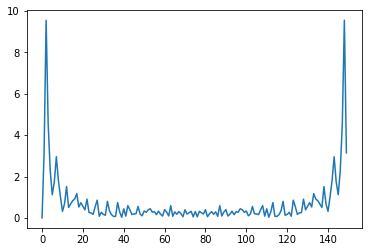

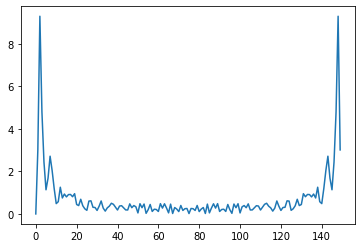

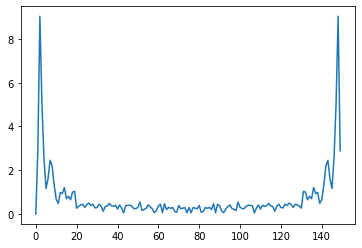

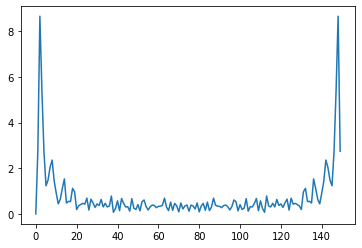

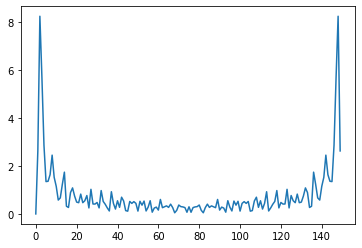

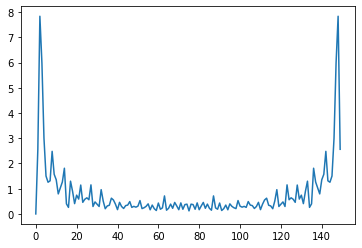

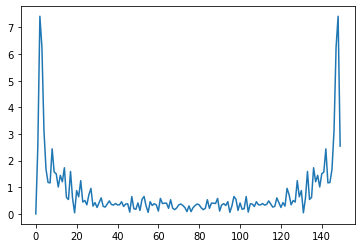

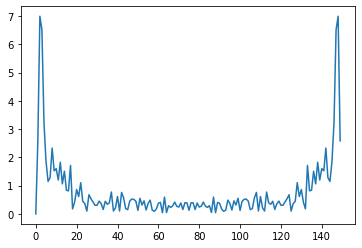

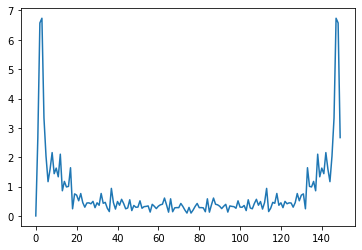

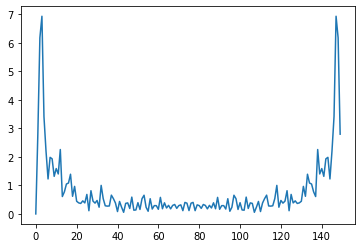

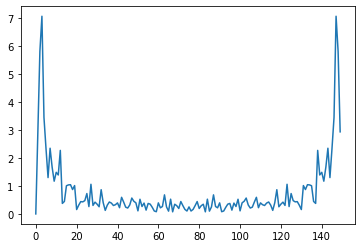

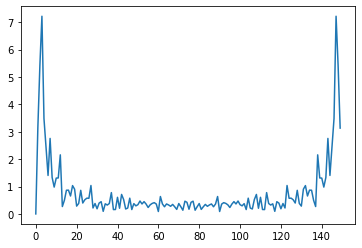

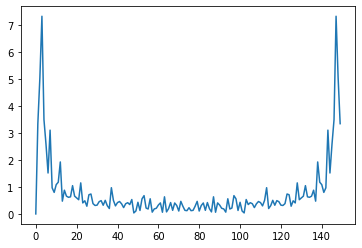

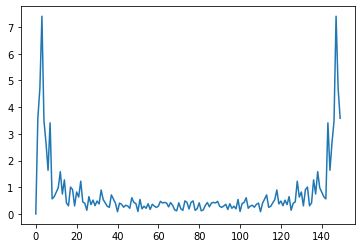

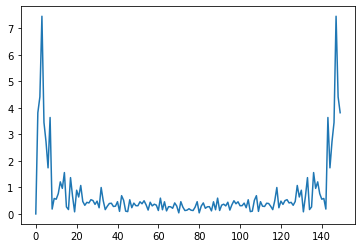

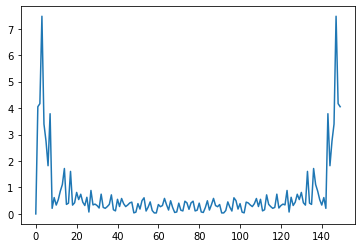

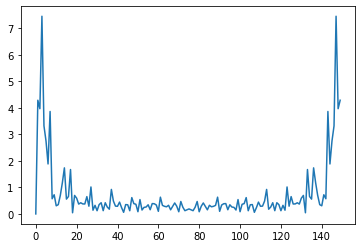

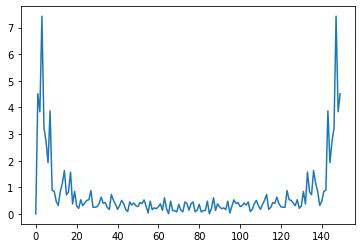

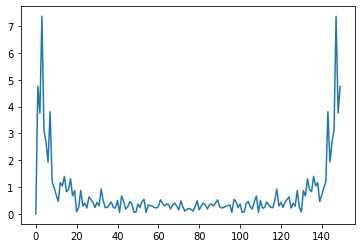

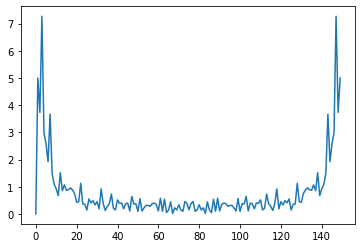

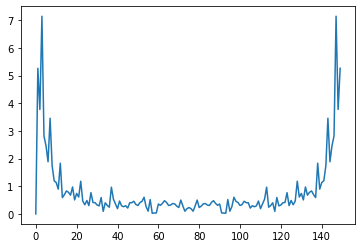

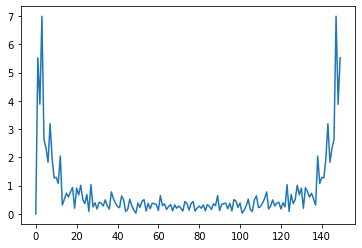

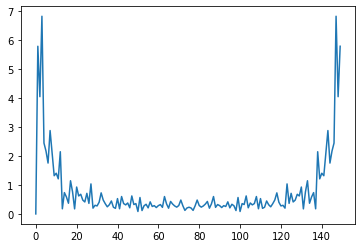

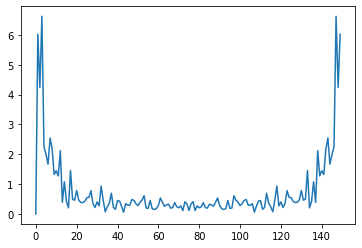

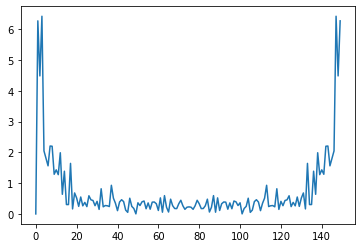

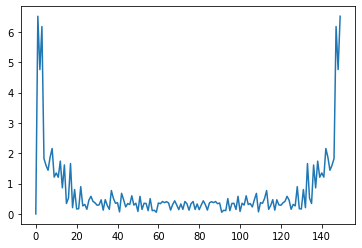

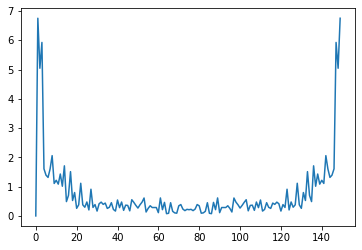

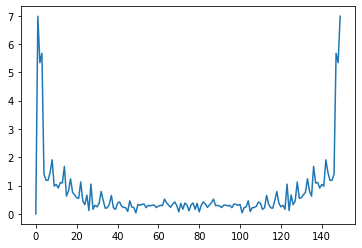

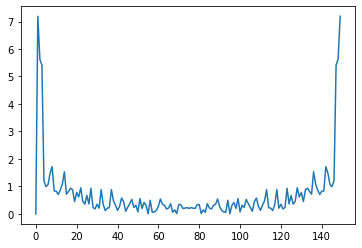

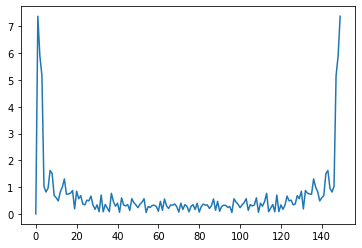

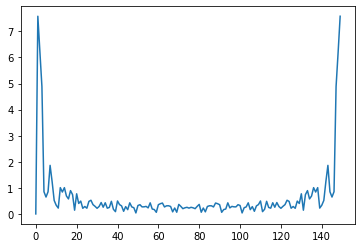

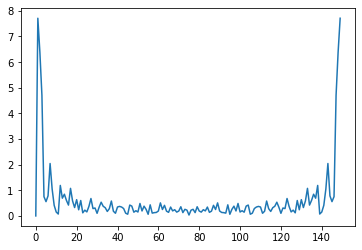

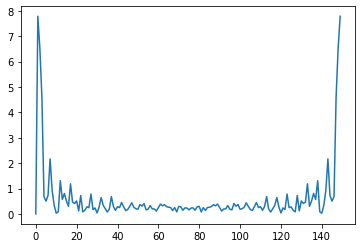

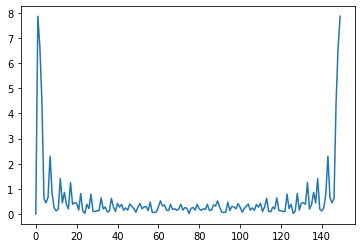

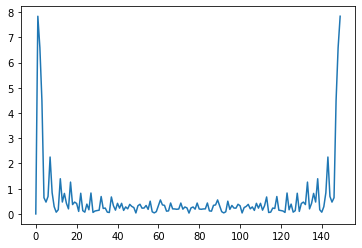

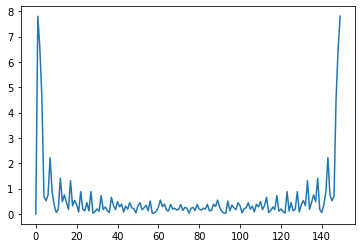

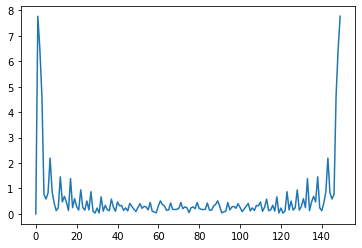

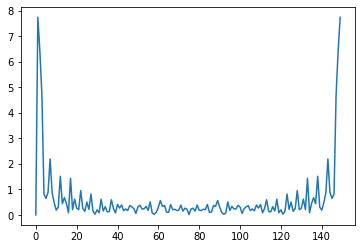

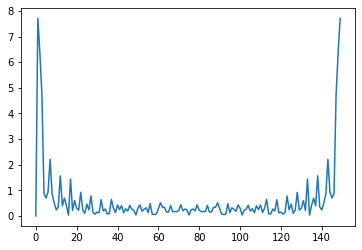

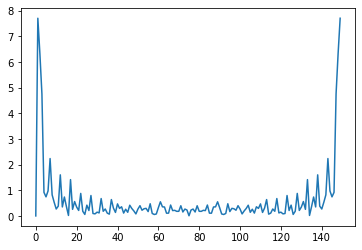

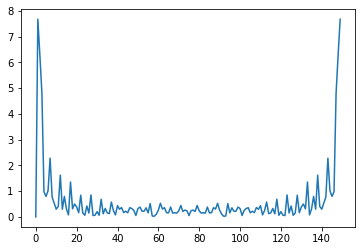

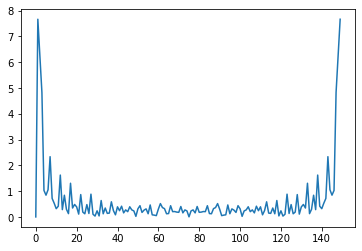

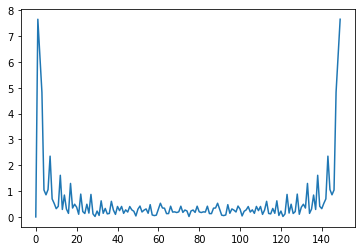

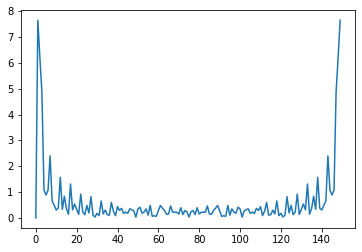

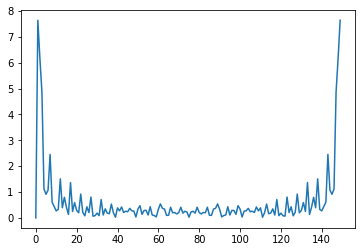

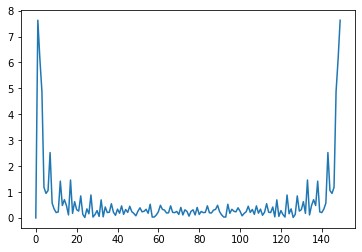

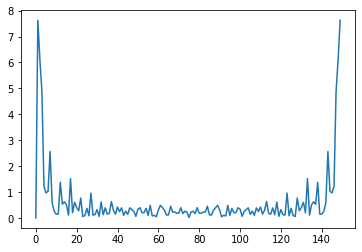

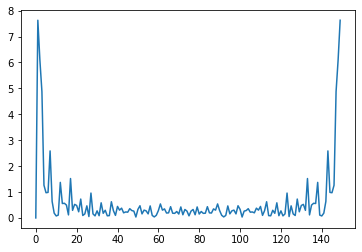

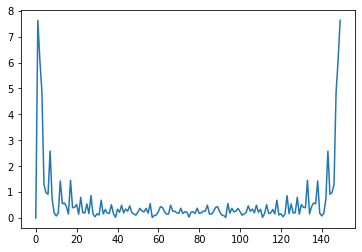

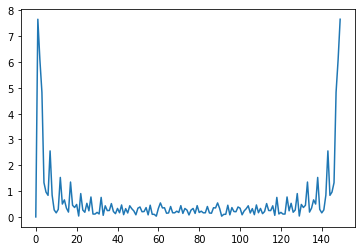

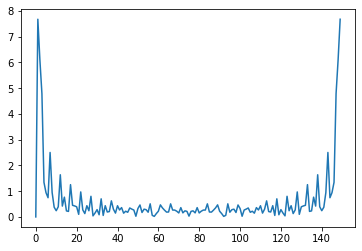

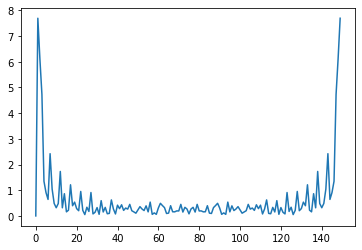

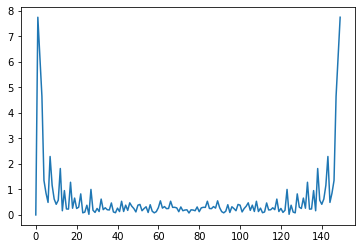

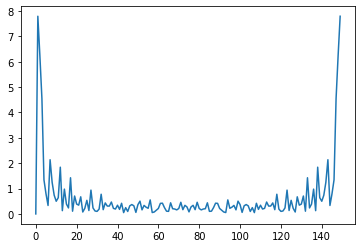

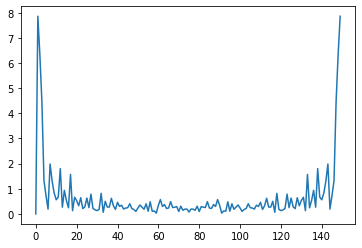

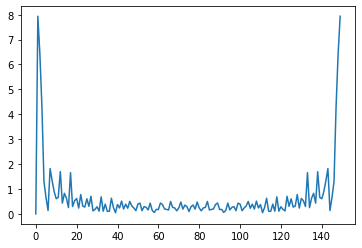

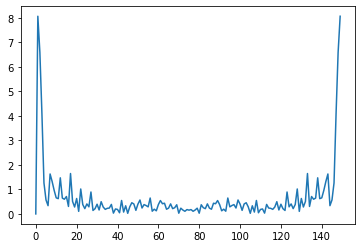

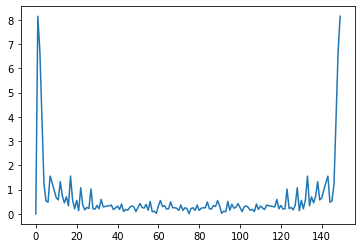

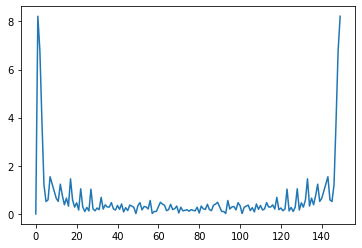

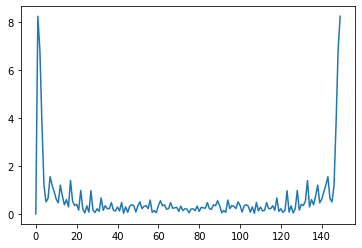

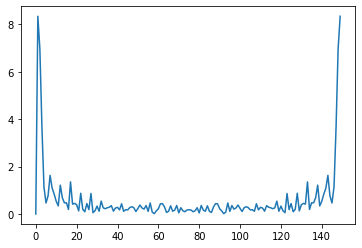

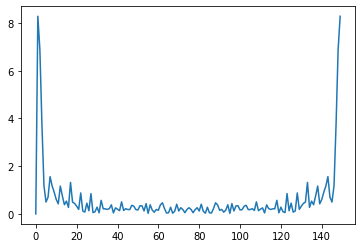

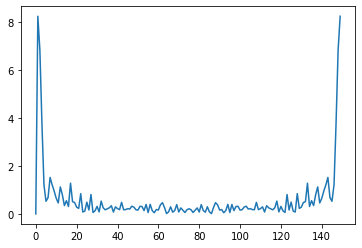

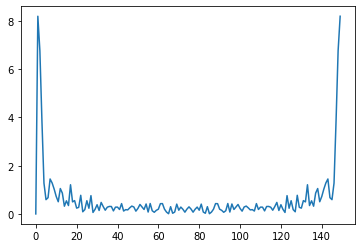

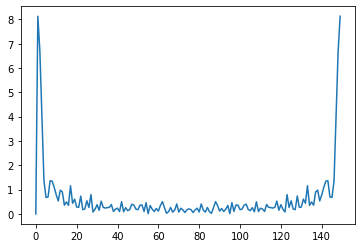

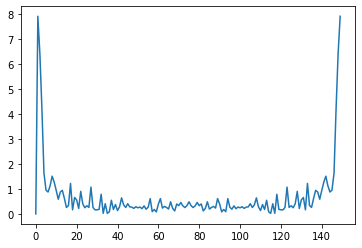

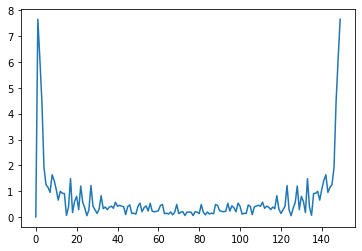

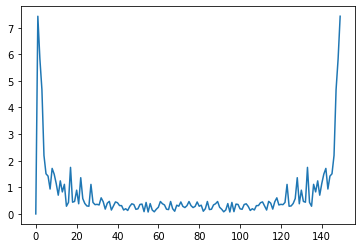

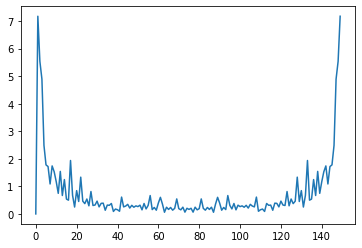

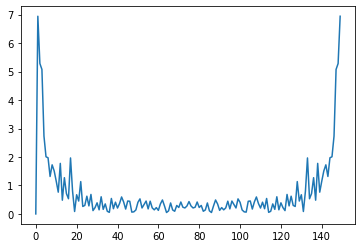

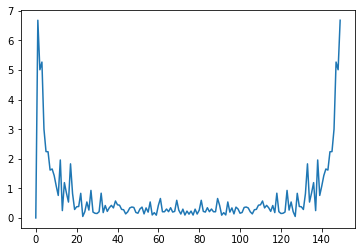

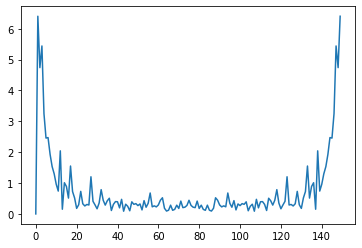

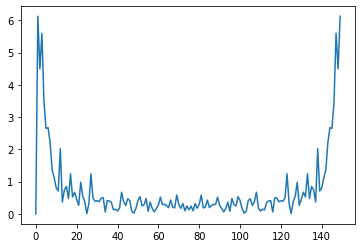

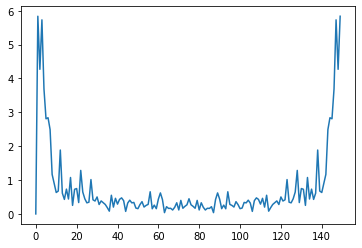

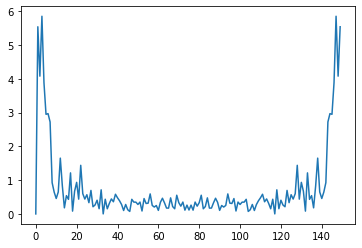

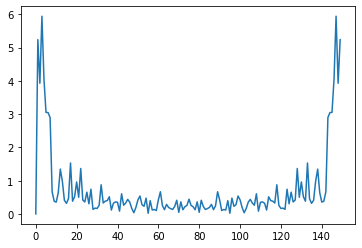

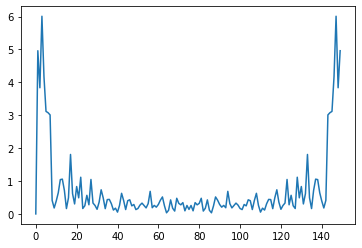

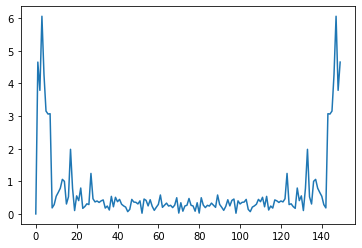

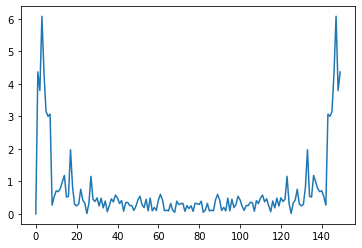

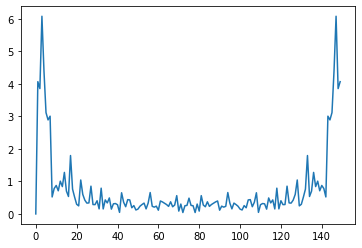

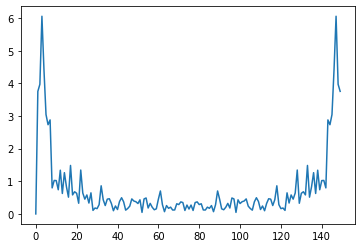

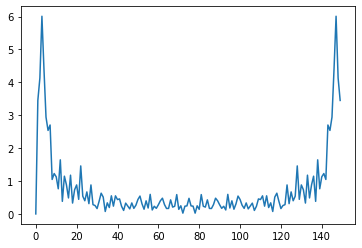

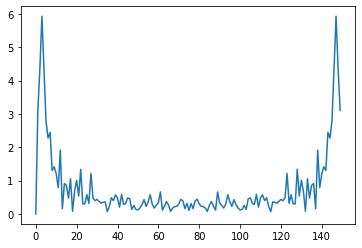

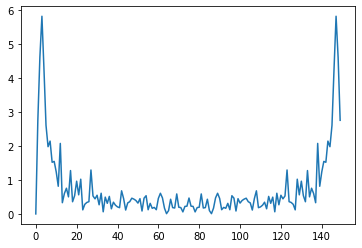

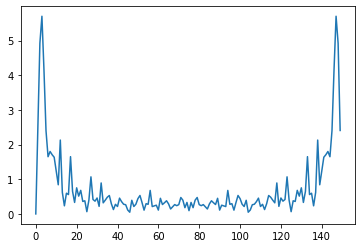

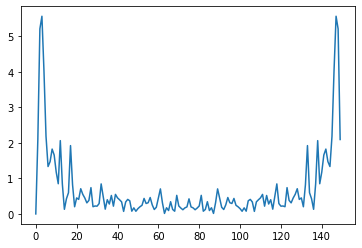

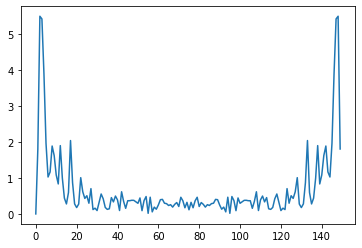

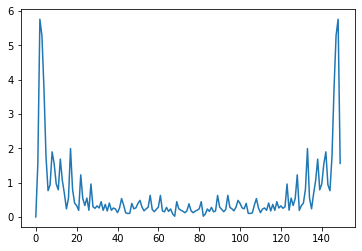

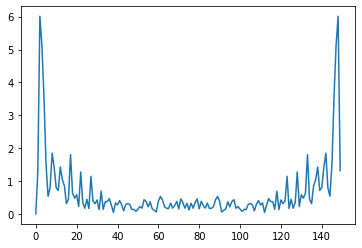

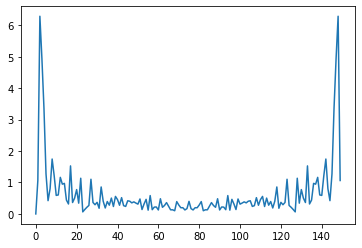

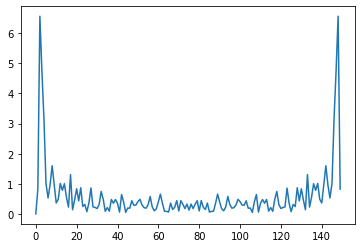

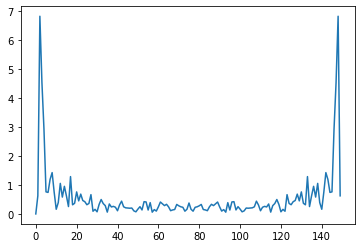

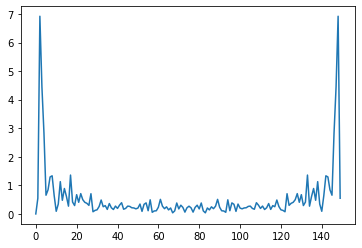

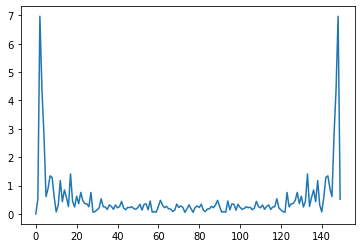

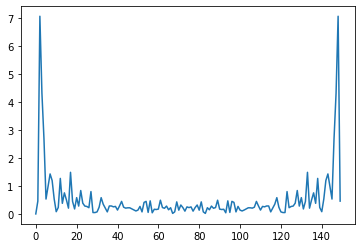

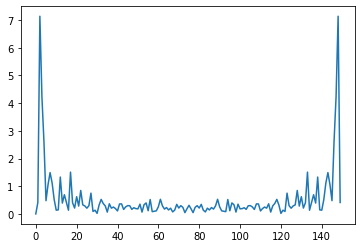

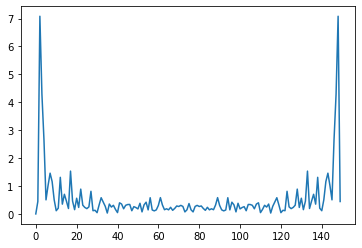

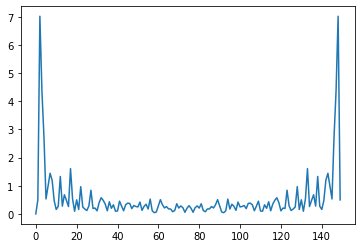

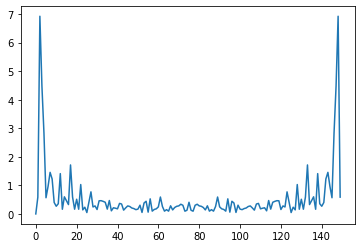

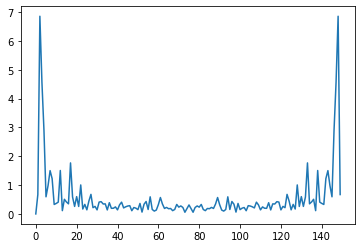

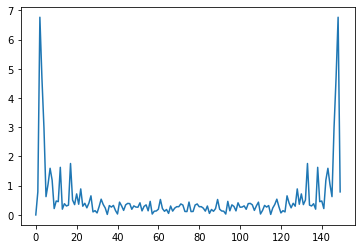

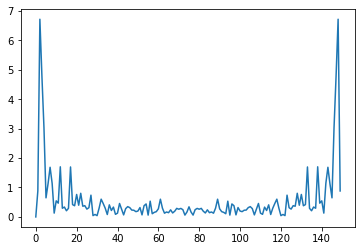

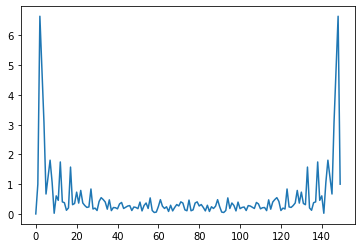

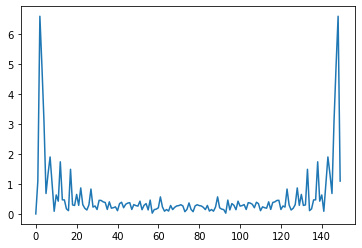

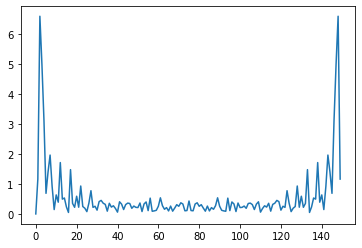

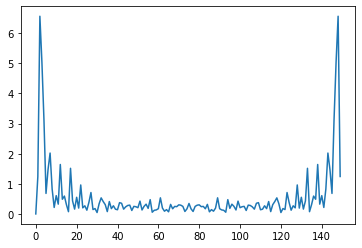

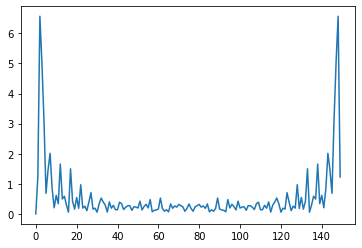

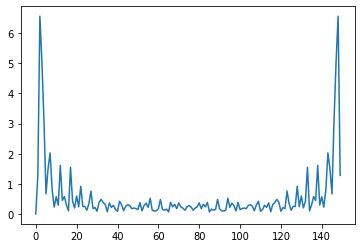

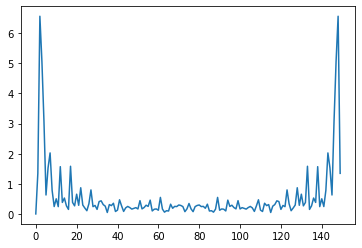

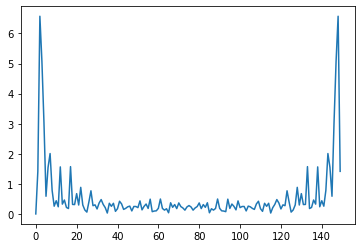

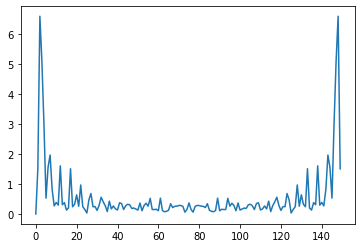

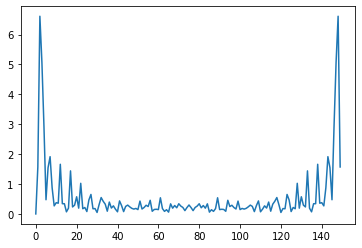

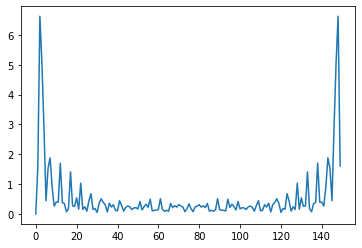

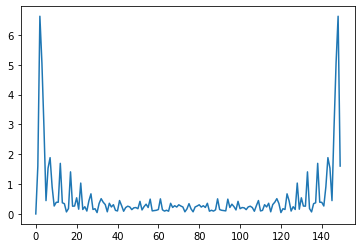

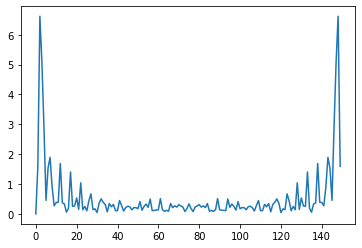

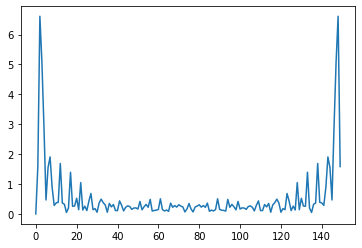

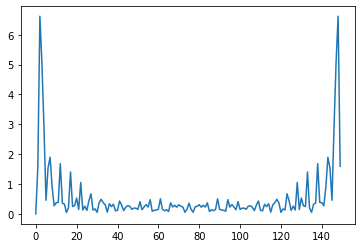

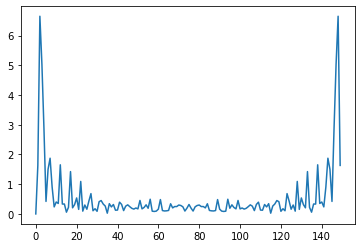

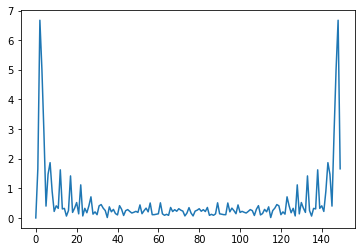

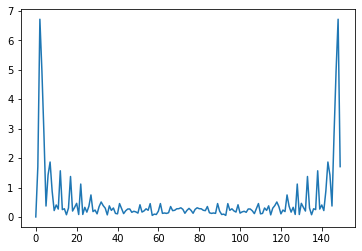

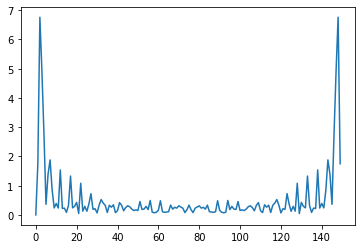

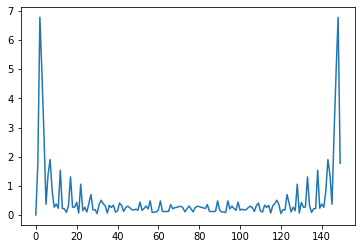

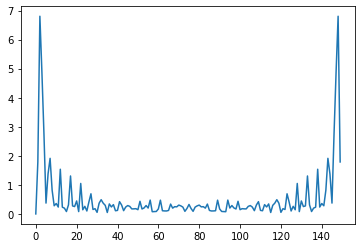

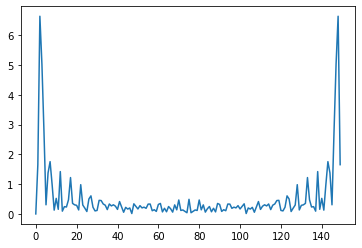

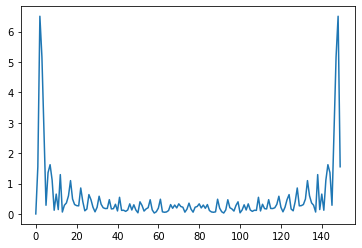

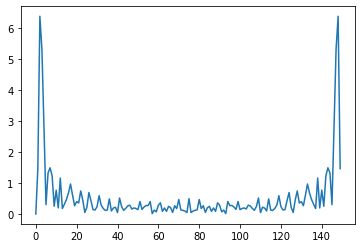

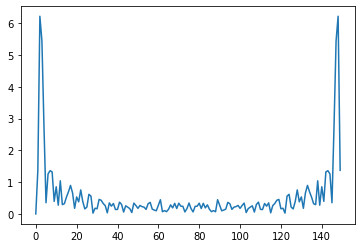

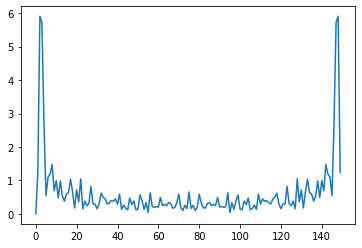

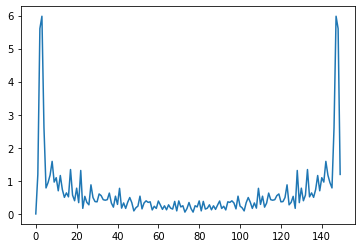

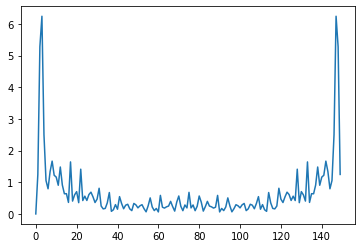

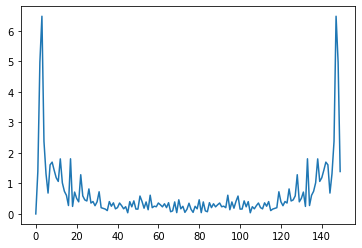

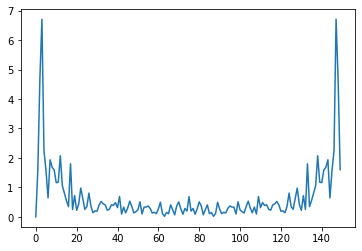

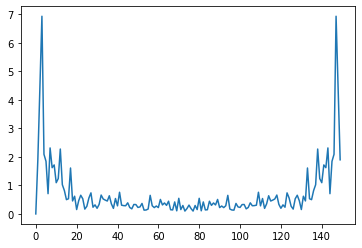

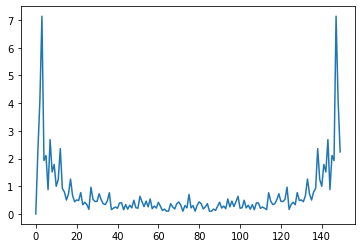

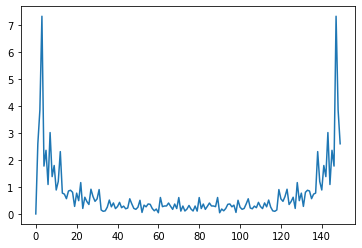

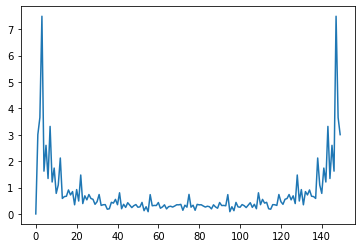

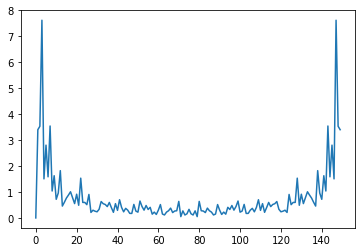

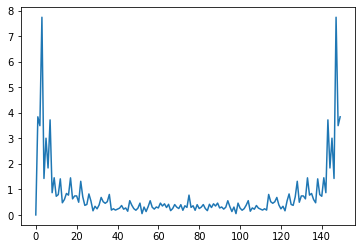

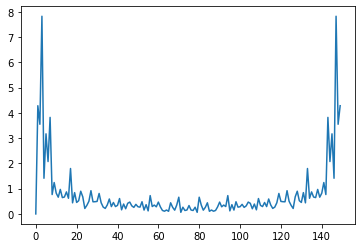

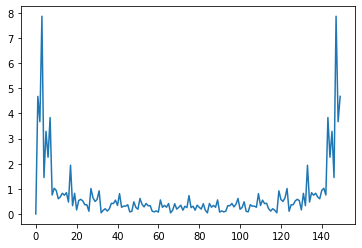

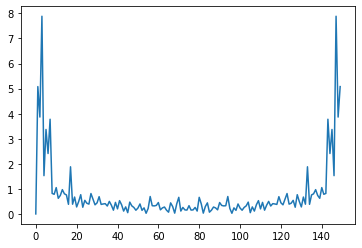

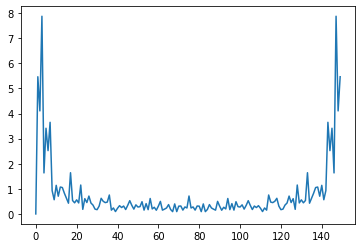

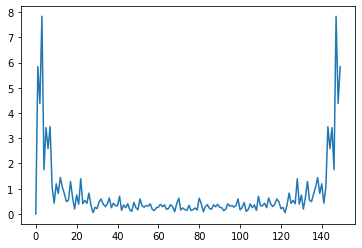

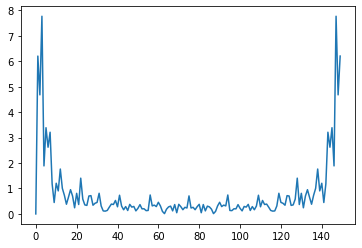

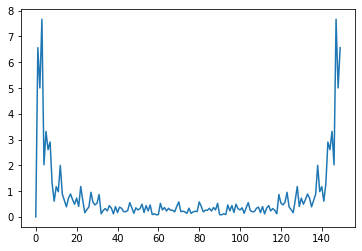

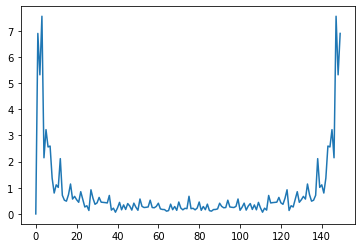

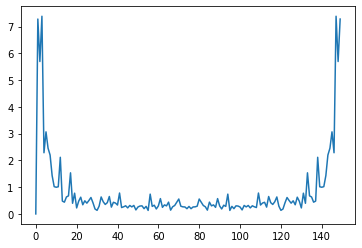

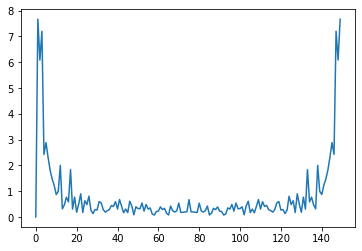

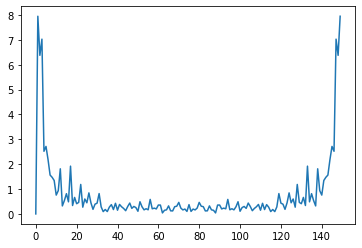

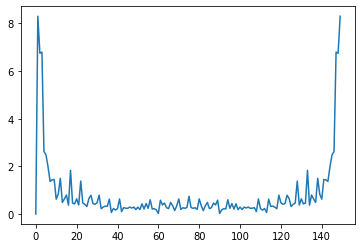

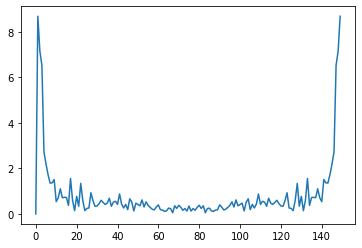

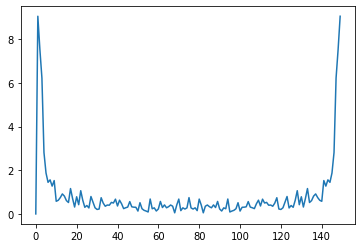

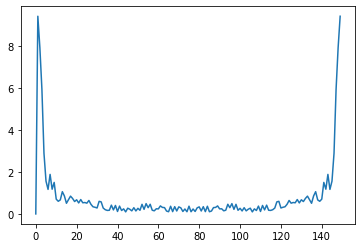

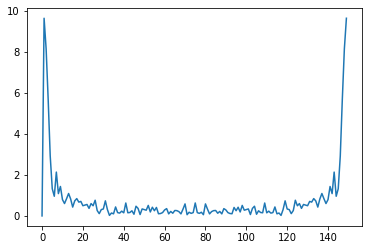

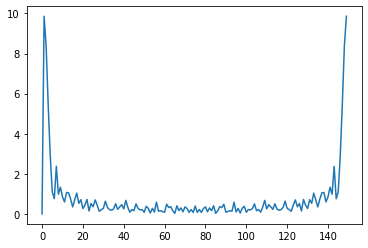

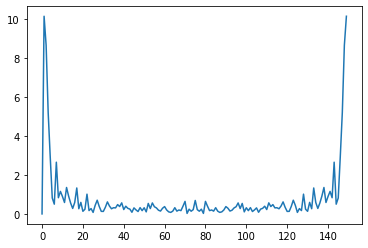

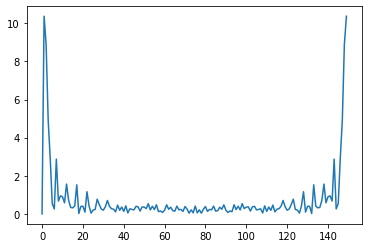

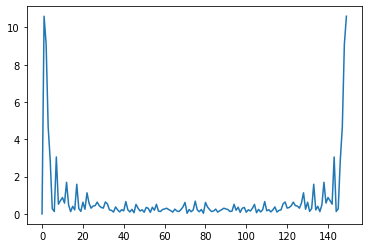

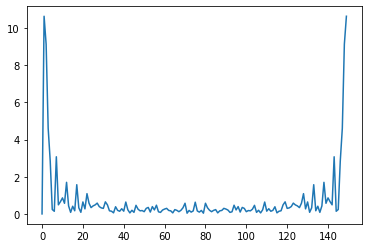

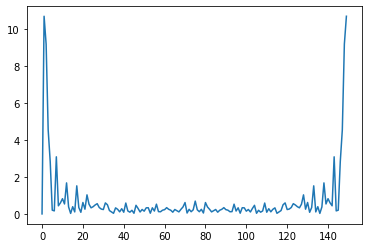

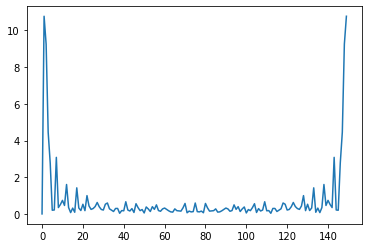

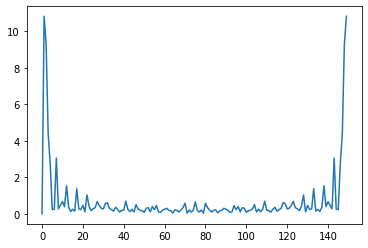

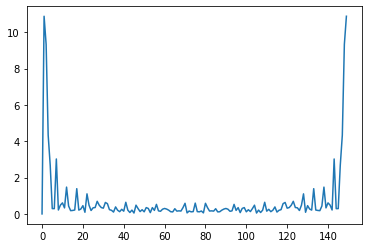

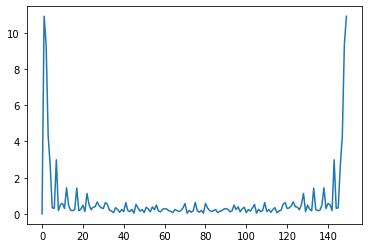

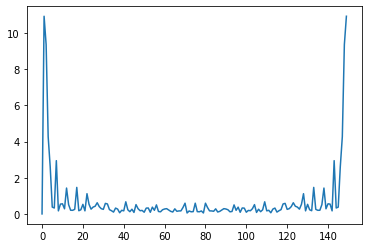

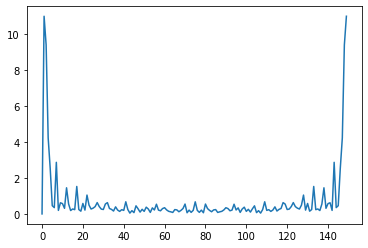

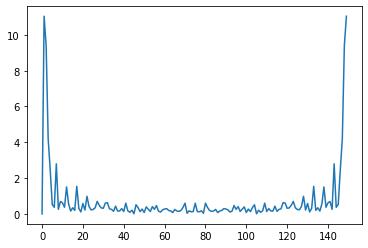

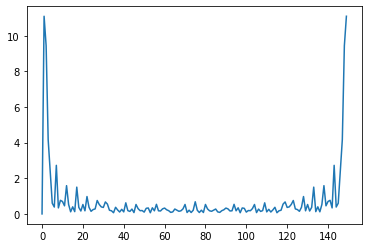

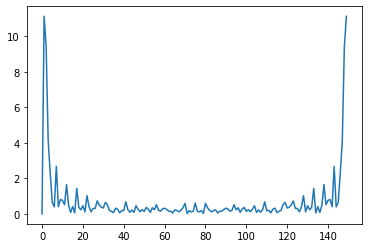

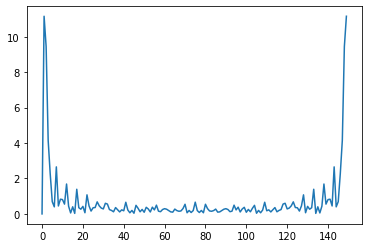

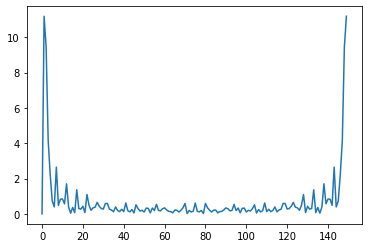

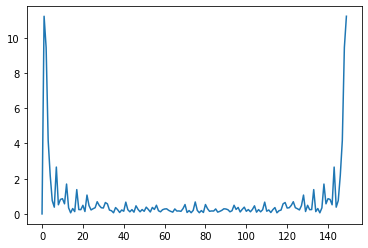

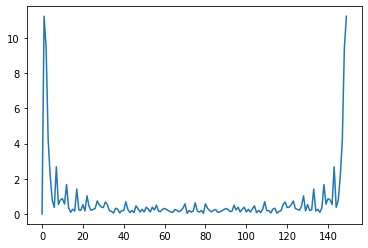

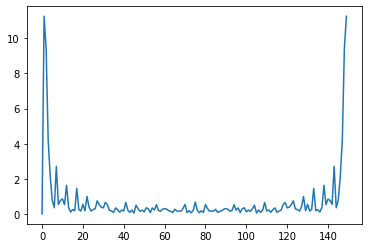

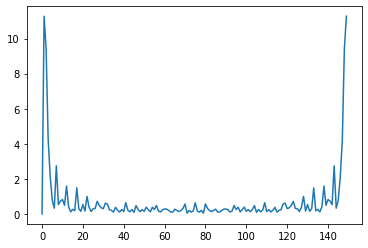

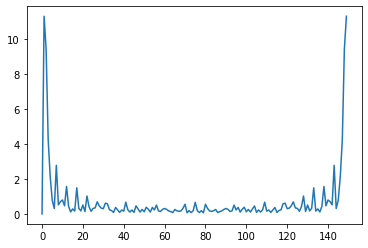

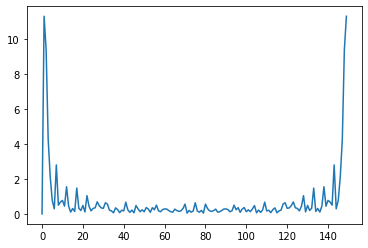

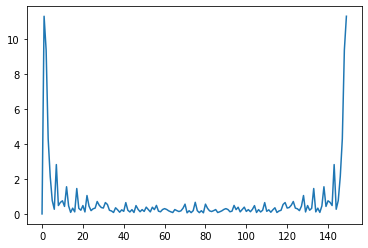

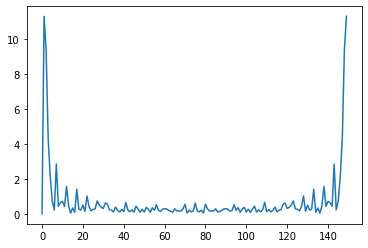

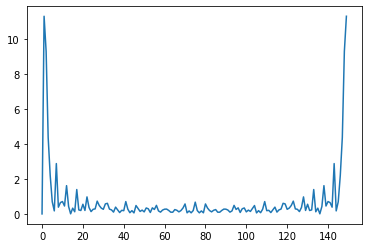

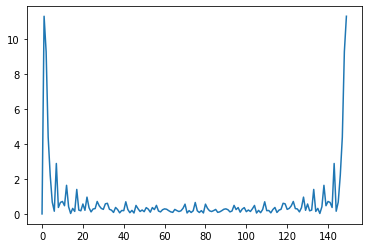

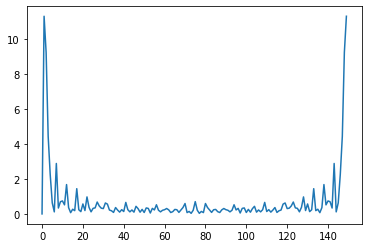

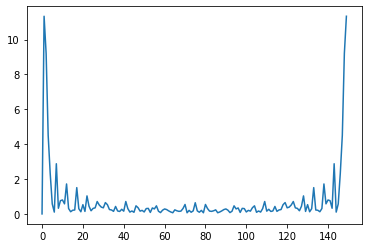

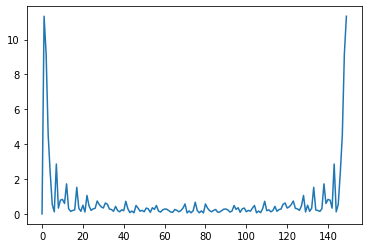

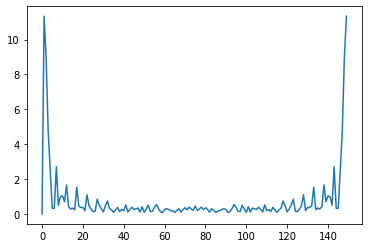

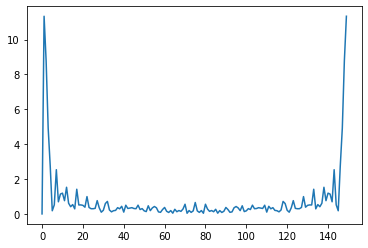

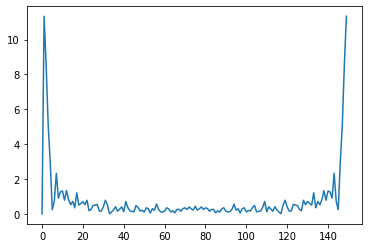

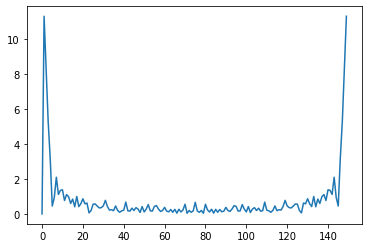

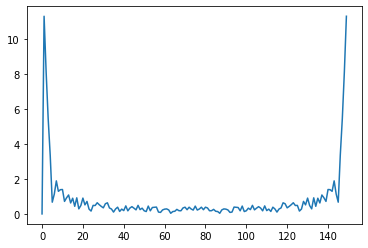

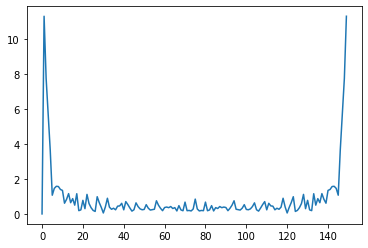

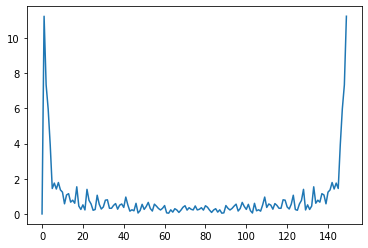

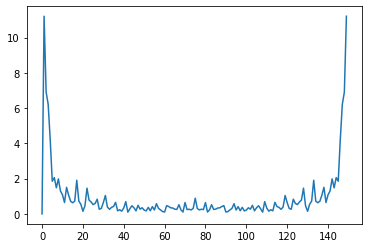

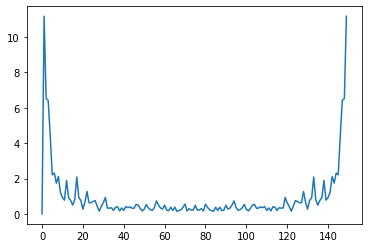

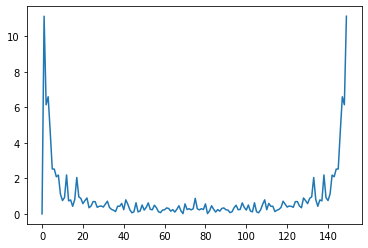

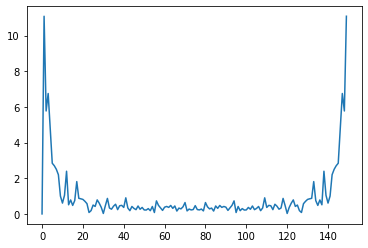

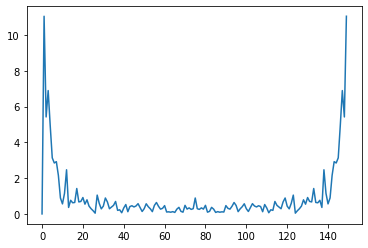

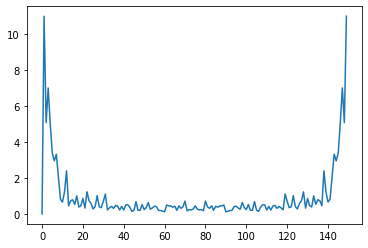

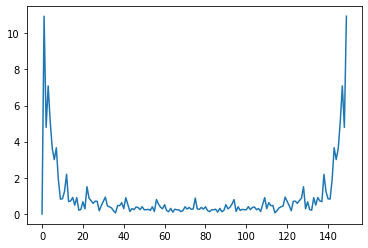

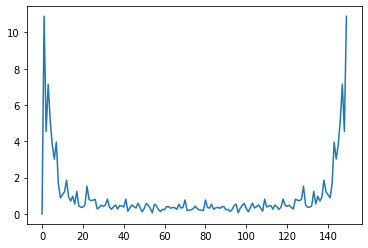

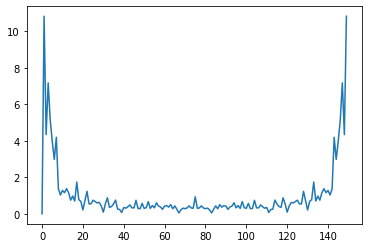

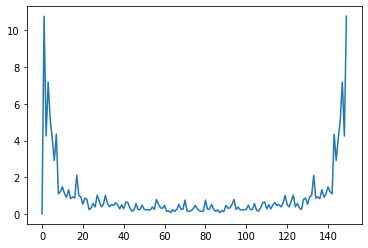

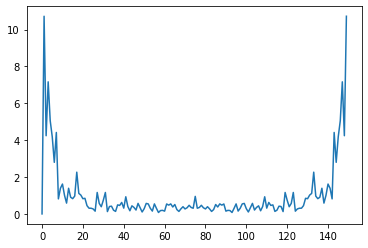

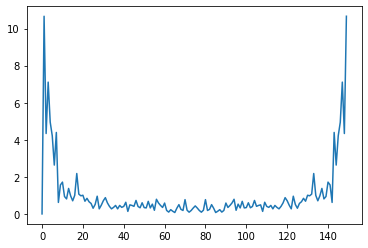

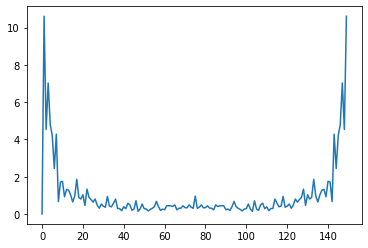

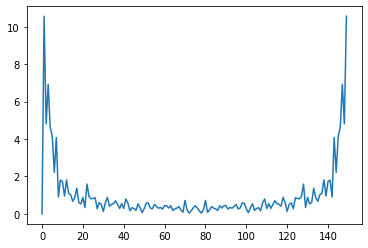

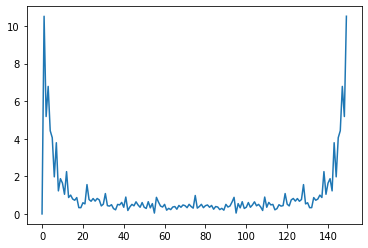

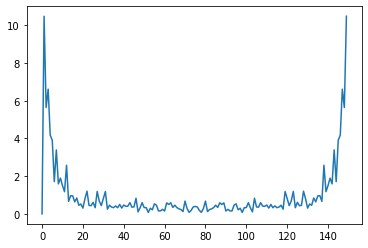

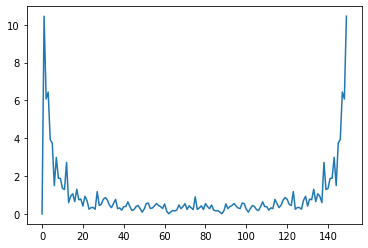

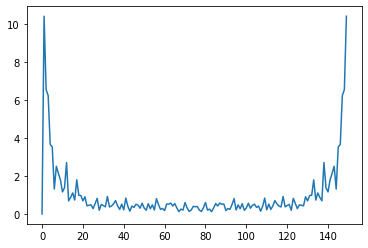

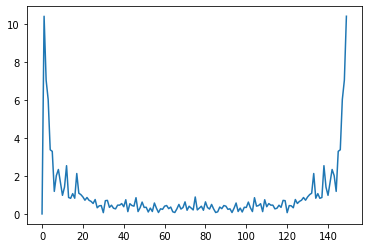

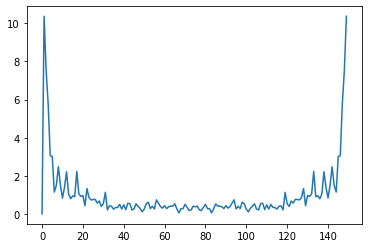

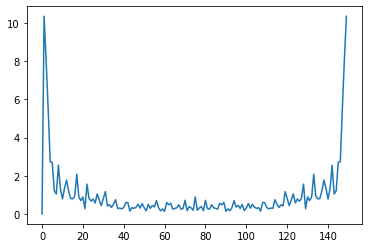

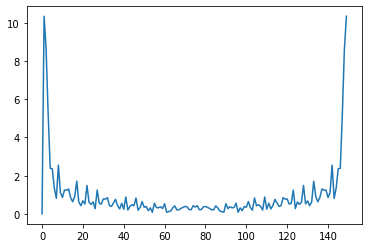

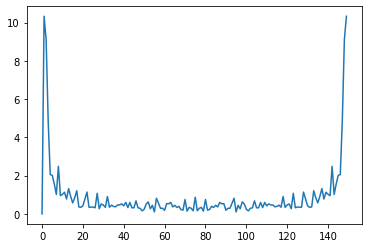

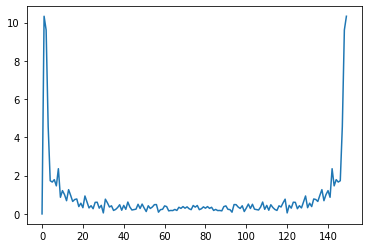

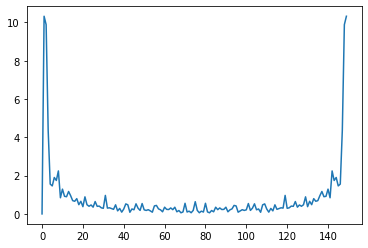

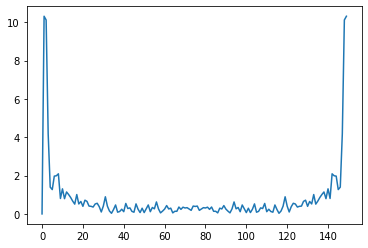

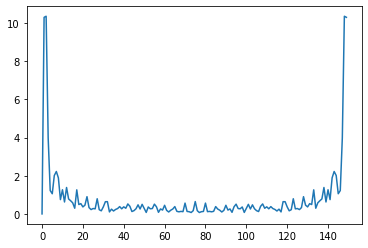

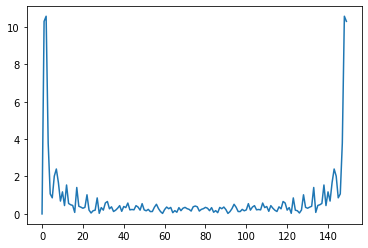

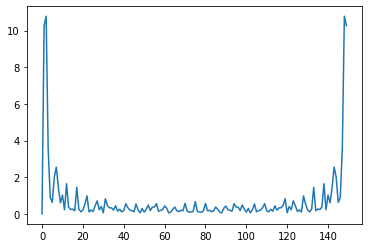

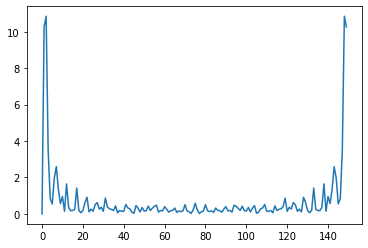

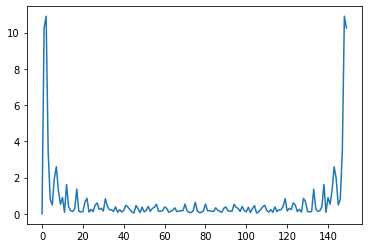

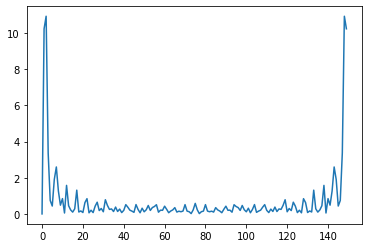

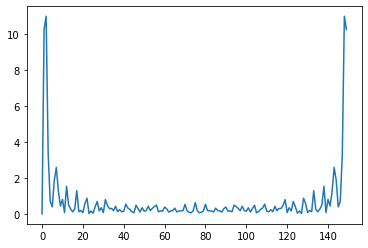

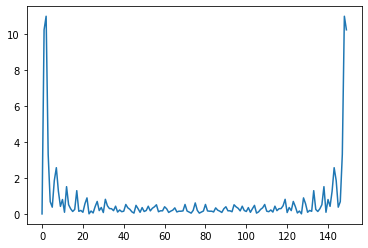

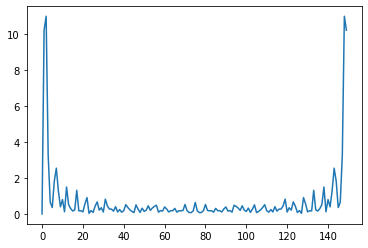

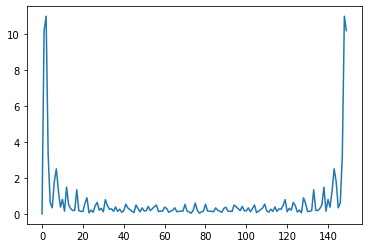

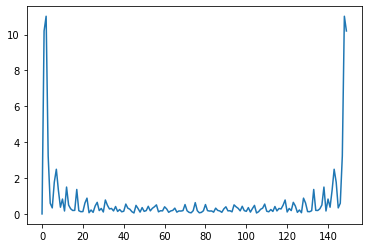

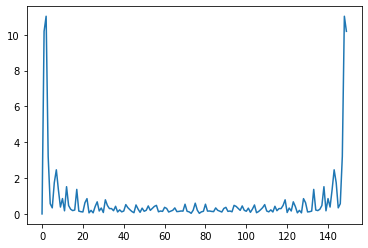

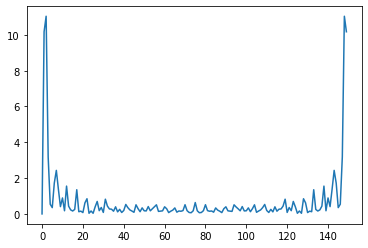

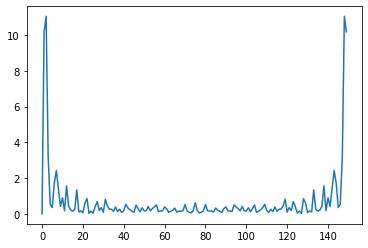

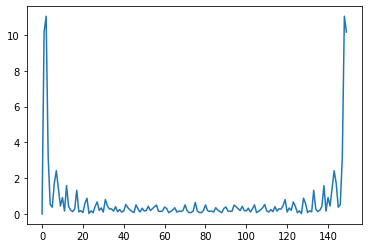

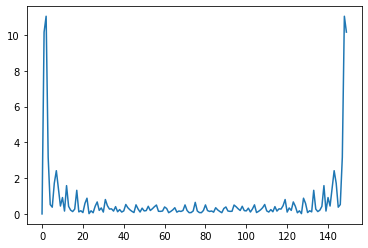

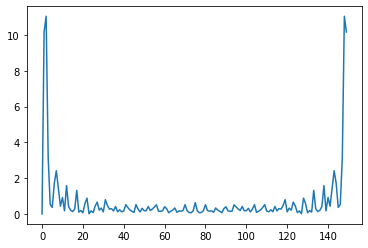

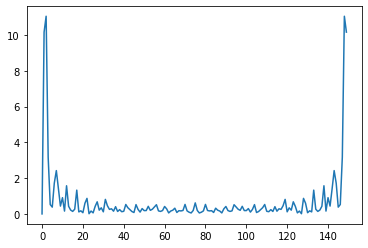

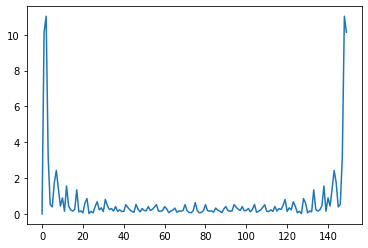

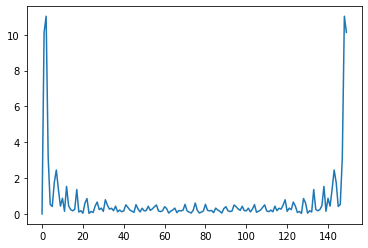

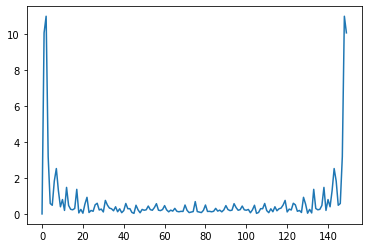

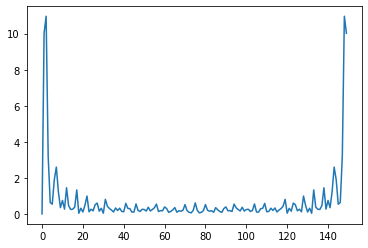

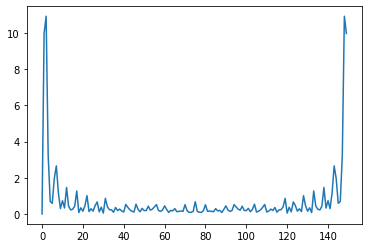

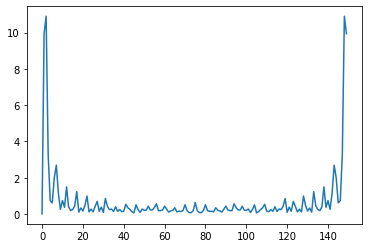

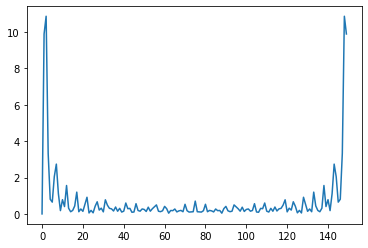

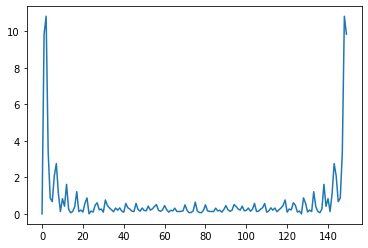

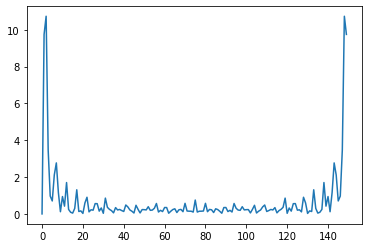

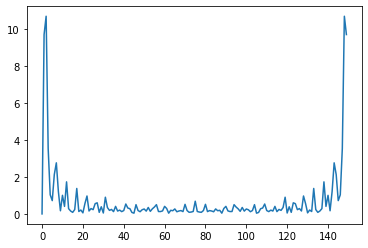

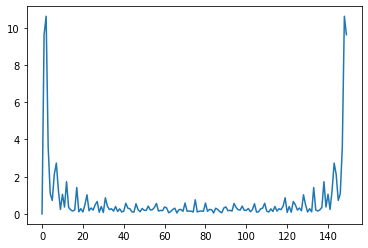

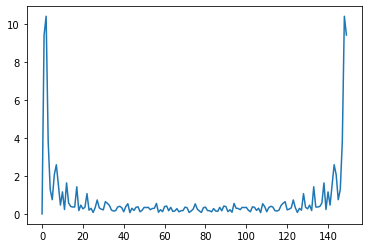

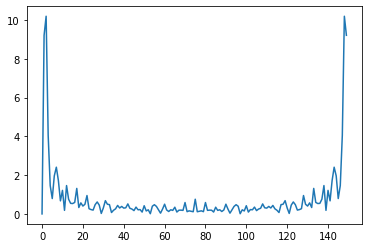

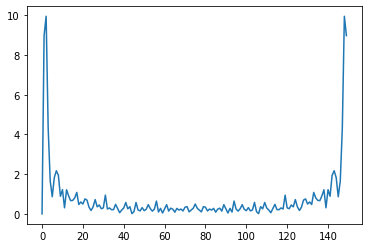

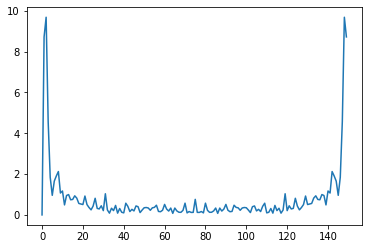

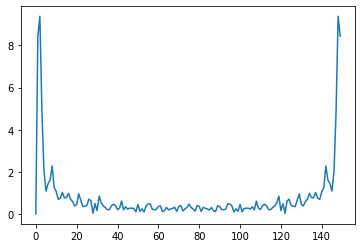

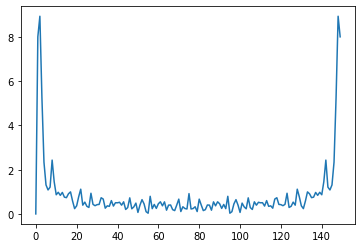

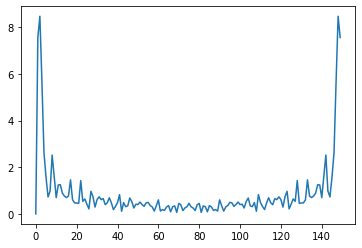

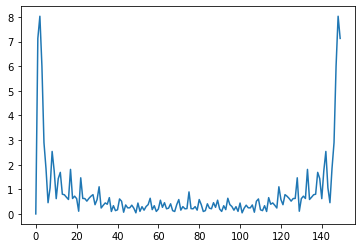

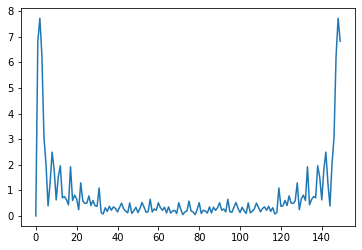

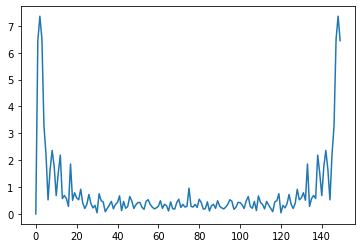

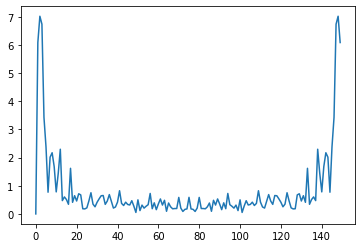

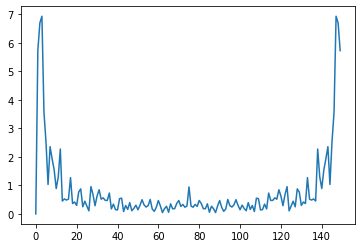

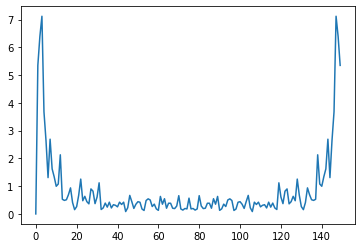

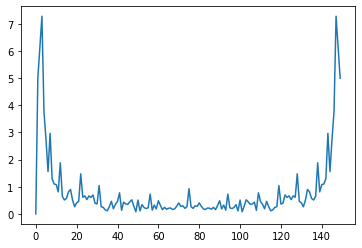

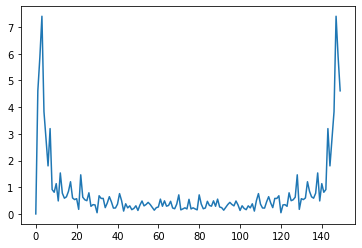

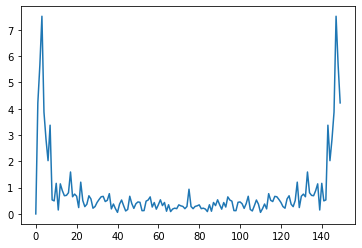

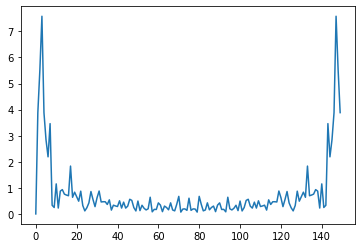

KeyError: 'class'

In [17]:
dataPath = "F:\\Finger_vein_Database\\abc"
savepath="D:\\study"

length=150
overlap=50

#경로지정
paths=glob.glob(os.path.join(dataPath,"*/*/*.avi"))
#print(len(paths)) #160

# dict 선언
trainDict={}
testDict={}

train_frequency=[]
train_class=[]

test_frequency=[]
test_class=[]

# 파일 하나씩 불러와서 처리
# 1~10 까지  train
# 11~20 까지 test
for file_path in (paths):
    file_num= int((file_path).split('\\')[-2]) # 실험자 번호
    label= file_path.split('\\')[-3] # real or fake

    cap=cv2.VideoCapture(file_path)
    Frame_num=int(cap.get(cv2.CAP_PROP_FRAME_COUNT))# 총 얻음 frame수
    Fp=int(cap.get(cv2.CAP_PROP_FPS))# 촬영한 카메라가 sr이 30

    signal=[]

    if label=='real':
        val=1
    else :
        val=-1

    while True:
        ret,frame=cap.read()
        if ret is False:
            break

        gray_img=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
        signal.append(np.mean(gray_img))# 픽셀의 평균값 추가


    for s in range(0,Frame_num+1):
        cut_signal=signal[s:s+length]- np.mean(signal[s:s+length])
        frequency=fft(cut_signal)
        frequency=np.abs(frequency)
        plt.plot(frequency)
        plt.show()

        if file_num<=10:
            # train
            train_frequency.append(frequency)
            train_class.append(val)
        else :
            test_frequency.append(frequency)
            test_class.append(val)
        s += overlap
        if s+length >Frame_num:
            break

trainDict['freq_signal']=np.array(train_frequency)
trainDict['class']==np.array(train_class)
testDict['freq_signal']==np.array(test_frequency)
testDict['class']==np.array(test_class)

In [19]:
import pickle
with open(os.path.join(savepath, 'train.p4'), mode='wb') as f:
    pickle.dump(trainDict, f, protocol=4)
    print("'train.p4' is created!!'")
    
with open(os.path.join(savepath, 'test.p4'), mode='wb') as f:
    pickle.dump(testDict, f, protocol=4)
    print("'test.p4' is created!!'")

'train.p4' is created!!'
'test.p4' is created!!'
